Stock Volatility Prediction

The finite sum property of the least-squares objective, specifically the objective function is a sum of component errors across $D$ data points: $f(w) = \sum_{d = 1}^Df^d(w)$. The function $f^d(w)$ is defined as: 
$$
    f^d(w) :=\left( v^d  - \sum_{j=0}^{M+1} w_j h_j(d) \right)^2
$$
where $M$ is the number of words in the vocabulary, $h_j(d) = \log(1 + \mathrm{freq}(w_j,d))$, where $\mathrm{freq}(w_j,d)$ is the count of the number of times word $j$ arises in document $d$. 

1. Executing Linear Regression module of scikit-learn to minimize the mean squared error (MSE). This module applies Singular Value Decomposition (SVD which should result in the optimal coefficients of the model) to minimize MSE that amounts to finding a $w^*$ that satisfies $\nabla f(w) = 0$. In this case, $w^*$ is guaranteed to get close to a global minimum because the linear regression model is convex which means there is only one minimum to converge towards which is the global minimum.<br></br>

Now, we experiment with the parameters of Gradient Descent (GD) and Stochastic Gradient Descent (SGD). Specifically, the number of iterations, stopping tolerance, and step size rule, while focusing on improving the MSE from part 1.<br></br>
We improved on the MSE on part 1, specifically by changing the step size rule from 'constant' to 'adaptive' and also decreasing the stopping tolerance from '1e-3' to '1e-4'. This helped in decreasing MSE the most. Also the run time per epoch in this case decreased significantly as we changed our step size rule.

Loading Data:

In [ ]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn import preprocessing

def data_loader():    
    X_train, y_train    = load_svmlight_file('log1p.E2006.train.bz2',   n_features=4272227)
    X_test, y_test      = load_svmlight_file('log1p.E2006.test.bz2',    n_features=4272227)
    scaler = preprocessing.Normalizer().fit(X_train)
    X_train             = scaler.transform(X_train)
    X_test              = scaler.transform(X_test)
    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test    = data_loader()
num_train_obs, num_features         = np.shape(X_train)
num_test_obs, num_features          = np.shape(X_test)    

# Print basic stats of data set
print('{:>40s}:\t {:<20.0f}'.format('# of training observations',num_train_obs))
print('{:>40s}:\t {:<20.0f}'.format('# of test observations',num_test_obs))
print('{:>40s}:\t {:<20.0f}'.format('# of features',num_features))

              # of training observations:	 16087               
                  # of test observations:	 3308                
                           # of features:	 4272227             


Gradient Descent (GD):

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import time
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty= 'l1',
                                    alpha           = 0.001,
                                    max_iter        = 700,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3)

print('\nGradient Descent:\n')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()

per_iter_runtime_list = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
    
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))


Gradient Descent:

      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.3743         0.4159         0.0638           -0.4            1.7
            100         0.2582         0.3054         0.3542           -0.1           67.2
            200         0.2506         0.2951         0.3732           -0.0          131.3
            300         0.2500         0.2983         0.3747           -0.0          199.1
            400         0.2487         0.2954         0.3779           -0.0          279.9
            500         0.2479         0.2930         0.3799           -0.0          355.1
            600         0.2487         0.2978         0.3778           -0.0          421.4
            700         0.2484         0.2971         0.3786           -0.0          508.5
            800         0.2490         0.2996         0.3771           -0.0          588.1
            900         0.2484         0.2976         0.3786          

Stochastic Gradient Descent (SGD):

In [ ]:
import itertools

print('Stochastic Gradient Descent via SGD:\n')
print('{:>15}|{:>15}|{:>15}|{:>15}|{:>15}|{:>15}|{:>15}|{:>15}'.format('alpha','learning_rate','penalty','Train MSE','Test MSE','Train R-square','Test R-square','runtime (s)'))
params = itertools.product(*[[1e-2,1e-3,1e-4],['constant', 'adaptive'],['l1','l2']])

for param in params:
    start = time.time()
    sgd             = SGDRegressor(                                    
                                        fit_intercept   = True,
                                        penalty         = param[2],
                                        alpha           = param[0],
                                        max_iter        = 1000,
                                        learning_rate   = param[1],
                                        tol             = 1e-5,
                                        verbose         = False         # Change to True to see the per iteration cost
                                        )   

    #Execute SGD method
    sgd.fit(X_train, y_train)
    runtime = time.time() - start
    sgd_train_error         = mean_squared_error(sgd.predict(X_train), y_train)
    sgd_test_error          = mean_squared_error(sgd.predict(X_test), y_test)
    sgd_r_square_train      = sgd.score(X_train, y_train)    
    sgd_r_square_test       = sgd.score(X_test, y_test)   

    print('{:>15.4f}|{:>15}|{:>15.2}|{:>15.4f}|{:>15.2f}|{:>15.2f}|{:>15.2f}|{:>15.2f}'.format(param[0],param[1],param[2],sgd_train_error,sgd_test_error,sgd_r_square_train,sgd_r_square_test,runtime))


Stochastic Gradient Descent via SGD:

          alpha|  learning_rate|        penalty|      Train MSE|       Test MSE| Train R-square|  Test R-square|    runtime (s)
         0.0100|       constant|             l1|         0.3998|           0.38|          -0.00|          -0.32|          13.33
         0.0100|       constant|             l2|         0.2830|           0.28|           0.29|           0.03|          13.64
         0.0100|       adaptive|             l1|         0.3998|           0.38|          -0.00|          -0.32|          29.33
         0.0100|       adaptive|             l2|         0.2815|           0.27|           0.30|           0.06|          26.50
         0.0010|       constant|             l1|         0.2639|           0.28|           0.34|           0.04|          21.17
         0.0010|       constant|             l2|         0.1816|           0.19|           0.55|           0.33|          24.20
         0.0010|       adaptive|             l1|         0.2648|  

Procedding further by computing the partial derivative of $f^d(w)$ with respect to a given $w_j$. This was required after realizing that if a word $j$ does not appear in document $d$, that is, $\mathrm{freq}(w_j,d) = 0$, then $h_j(d)$ = 0. Therefore, the partial derivative expression reduces to 0. This means that this partial derivative of $f^d(w)$ with respect to $w_j$ is 0 when word j does not appear in a document $d$. <br></br>
Also, the sparsity of a matrix refers to the property that many of its elements are zero. In conclusion, if we apply the above result to each document, we can see that we only need to compute the partial derivatives for the non-zero elements of the feature matrix. Therefore, the sparsity of a matrix greatly reduces the number of computations resulting in reduced cost of computing the gradient with respect to the number of features (i.e., $M$), which can be especially significant when M is large (in millions in this case), eventually speeding up the optimization process which can prove to be very beneficial in terms of cheaper gradient calculation, cost cutting, time saving, and efficiency.

In [ ]:
"""
    =====================
    Code for Loading Data
    =====================
"""
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import numpy as np


def data_loader():    
    X_train, y_train    = load_svmlight_file('kddb-raw-libsvm.train.bz2',   n_features=1163024)
    X_test, y_test      = load_svmlight_file('kddb-raw-libsvm.test.bz2',    n_features=1163024)

    # Normalize the data using StandardScaler, which scales the data to unit norm.
    # This line computes the normalization coefficient
    scaler = Normalizer().fit(X_train)

    # Use the tranform function to normalize the training and test feature data
    # Since we calling it from the scaler instance we created, it knows the correct
    # scaling for normalization
    X_train             = scaler.transform(X_train)
    X_test              = scaler.transform(X_test)

    return  X_train, X_test, y_train, y_test

if __name__== "__main__":
    X_train, X_test, y_train, y_test    = data_loader()

Train set: (19264097, 1163024)
Train set: (748401, 1163024)
Count of each class: (array([0., 1.]), array([ 2684437, 16579660]))


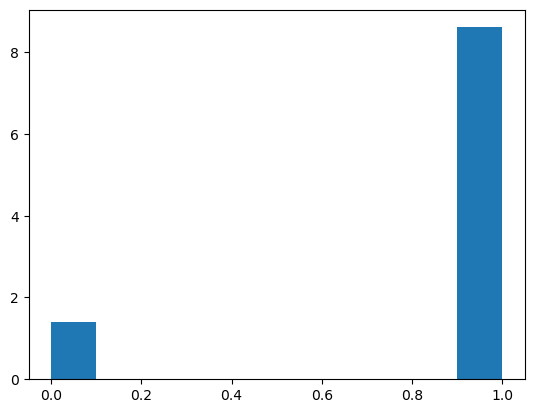

In [ ]:
if __name__== "__main__":
    print('Train set:',np.shape(X_train))
    print('Train set:',np.shape(X_test))
    plt.hist(y_train,density=True)
    #plt.hist(y_test,density=True) 
    print('Count of each class:', np.unique(y_train,return_counts=True))

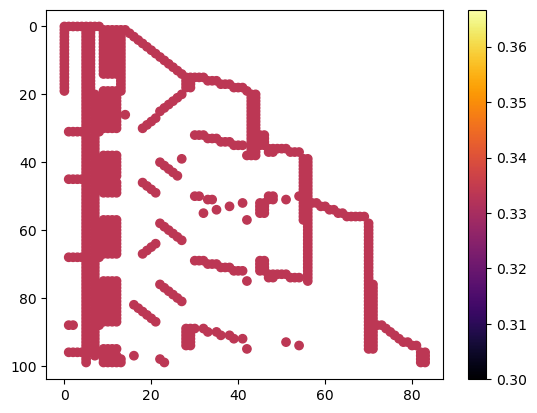

In [ ]:
import matplotlib.pyplot as plt

if __name__== "__main__":
    S1 = X_train
    StartRow = 0
    numRows = 100
    EndRow = StartRow + numRows
    numPointsStart = S1.indptr[StartRow]
    numPointsEnd = S1.indptr[StartRow + numRows]
    numPoints = numPointsEnd - numPointsStart
    xVals = S1.indices[numPointsStart:numPointsEnd]

    yVals = np.empty(numPoints, dtype= np.int32) 
    for rowInd in range(StartRow,EndRow):
        # print("Row Index: ", rowInd)
        dataStart = S1.indptr[rowInd]
        dataEnd = S1.indptr[rowInd + 1]
        # print(dataStart,dataEnd)
        for colInd in range(dataStart,dataEnd):
            yVals[colInd - S1.indptr[StartRow]] = rowInd

    dataVals = S1.data[numPointsStart:numPointsEnd]

    plt.scatter(xVals, yVals, c=dataVals, cmap='inferno')
    ax = plt.gca()
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.colorbar()
    plt.show()

Objective Function for model:
$$
1/n \sum_{1=0}^{n} max \{ 0, 1 - y_i f(x_i;w) \},
$$

In [ ]:
from sklearn.linear_model import SGDClassifier
import time
import numpy as np

if __name__== "__main__":
    model             = SGDClassifier(
                            loss                = 'hinge',
                            penalty             = 'l2',
                            alpha               = 0.0,
                            l1_ratio            = 0.0,
                            fit_intercept       = False,     
                            n_jobs              = 10,       # optional
                            learning_rate       = 'constant',
                            eta0                = 1,
                            verbose             = 1,
                            random_state        = 321,   
                            )

    start                 = time.time()
    print('='*100)                            
    model.fit(X_train, y_train)
    print('='*100)          
    train_accuracy       = model.score(X_train, y_train)    
    test_accuracy        = model.score(X_test, y_test)   
    SGD_n_iter_          = model.n_iter_
    runtime              = time.time() - start

    print('{:>15}{:>15}{:>15}{:>15}'.format('Train Accuracy','Test Accuracy','# Epochs','Runtime'))
    print('{:>15.5f}{:>15.5f}{:>15.0f}{:>15.3f}'.format(train_accuracy,test_accuracy,SGD_n_iter_,runtime))
    print('='*100)       

-- Epoch 1
Norm: 426.66, NNZs: 554969, Bias: 0.000000, T: 19264097, Avg. loss: 0.383528
Total training time: 5.62 seconds.
-- Epoch 2
Norm: 616.94, NNZs: 684704, Bias: 0.000000, T: 38528194, Avg. loss: 0.380198
Total training time: 10.17 seconds.
-- Epoch 3
Norm: 799.06, NNZs: 757507, Bias: 0.000000, T: 57792291, Avg. loss: 0.377629
Total training time: 14.79 seconds.
-- Epoch 4
Norm: 973.75, NNZs: 805999, Bias: 0.000000, T: 77056388, Avg. loss: 0.375243
Total training time: 19.65 seconds.
-- Epoch 5
Norm: 1140.68, NNZs: 841329, Bias: 0.000000, T: 96320485, Avg. loss: 0.373171
Total training time: 24.88 seconds.
-- Epoch 6
Norm: 1301.95, NNZs: 868303, Bias: 0.000000, T: 115584582, Avg. loss: 0.371298
Total training time: 29.41 seconds.
-- Epoch 7
Norm: 1457.70, NNZs: 890235, Bias: 0.000000, T: 134848679, Avg. loss: 0.369517
Total training time: 33.94 seconds.
-- Epoch 8
Norm: 1606.96, NNZs: 908120, Bias: 0.000000, T: 154112776, Avg. loss: 0.367927
Total training time: 38.47 seconds.
--

In [ ]:
from sklearn.linear_model import SGDClassifier
import time
import numpy as np

if __name__== "__main__":
    model             = SGDClassifier(
                            loss                = 'hinge',
                            penalty             = 'l2',
                            alpha               = 0.0,
                            l1_ratio            = 0.0,
                            fit_intercept       = False,     
                            n_jobs              = 10,       # optional
                            learning_rate       = 'constant',
                            eta0                = 1,
                            verbose             = 0,
                            random_state        = 321
                            )

    print('='*100)
    print('Gradient Descent:')
    print('{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train Accuracy','Test Accuracy','Runtime'))

    start                   = time.time()
    per_iter_runtime_list   = []
    
    for _ in range(SGD_n_iter_):
        per_iter_start   = time.time()
        model.partial_fit(X_train, y_train,classes=np.unique(y_train))
        per_iter_runtime = time.time() - per_iter_start
        per_iter_runtime_list.append(per_iter_runtime)

        if _%1==0:
            train_accuracy       = model.score(X_train, y_train)    
            test_accuracy        = model.score(X_test, y_test)   
            print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.3f}'.format(_,train_accuracy,test_accuracy,time.time()-start))
    
    print('='*100)

Gradient Descent:
      Iteration Train Accuracy  Test Accuracy        Runtime
              0         0.8574         0.8707         12.233
              1         0.8603         0.8737         24.093
              2         0.8631         0.8766         35.799
              3         0.8627         0.8735         47.439
              4         0.8647         0.8773         59.138
              5         0.8650         0.8754         70.886
              6         0.8631         0.8712         82.580
              7         0.8649         0.8726         94.244
              8         0.8624         0.8670        106.121
              9         0.8649         0.8710        117.759
             10         0.8638         0.8696        129.433
             11         0.8656         0.8699        141.163
             12         0.8660         0.8709        152.772
             13         0.8646         0.8704        164.197
             14         0.8704         0.8776        175.383
      

The total runtime of GD compared to the SGD is much more.
The average of GD runtime across the epochs compare to the average SGD runtime per epoch is also a lot.
The terminal training and test accuracies of the model fitted by GD are almost the same as compared to SGD.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
import time

import numpy as np

if __name__== "__main__":
    
    print('='*100)   
    print('{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Tol','Train Accuracy','Test Accuracy','# Epochs','Runtime'))
    for tol in [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]:

        model             = SGDClassifier(
                                loss                = 'hinge',
                                penalty             = 'l2',
                                alpha               = 0.0,
                                l1_ratio            = 0.0,
                                fit_intercept       = False,     
                                n_jobs              = 10,       # optional
                                learning_rate       = 'constant',
                                eta0                = 1,
                                verbose             = 0,
                                tol                 = tol,
                                random_state        = 321
                                )

        start                 = time.time()            
        model.fit(X_train, y_train) 
        train_accuracy       = model.score(X_train, y_train)    
        test_accuracy        = model.score(X_test, y_test)   
        runtime              = time.time() - start
        print('{:>15.0e}{:>15.5f}{:>15.5f}{:>15.0f}{:>15.3f}'.format(tol, train_accuracy,test_accuracy,model.n_iter_,runtime))
    print('='*100)       

            Tol Train Accuracy  Test Accuracy       # Epochs        Runtime
          1e-02        0.86157        0.87166              6         36.306
          1e-03        0.86102        0.86798             18         90.646
          1e-04        0.86897        0.87072             46        218.684
          1e-05        0.87466        0.87931             61        301.758
          1e-06        0.87347        0.87888             71        339.941
          1e-07        0.87347        0.87888             71        549.132


Model 2 via SGD:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
import time
import numpy as np

if __name__== "__main__":
    model             = SGDClassifier(
                            loss                = 'hinge',
                            penalty             = 'l2',
                            alpha               = 1e-4,
                            l1_ratio            = 0.0,
                            fit_intercept       = False,     
                            n_jobs              = 10,       # optional
                            learning_rate       = 'constant',
                            eta0                = 1,
                            verbose             = 1,
                            tol                 = tol,
                            random_state        = 321
                            )


    start                 = time.time()
    print('='*100)                            
    model.fit(X_train, y_train)
    print('='*100)          
    train_accuracy       = model.score(X_train, y_train)    
    test_accuracy        = model.score(X_test, y_test)   
    SGD_n_iter_          = model.n_iter_
    runtime              = time.time() - start

    print('{:>15}{:>15}{:>15}{:>15}'.format('Train Accuracy','Test Accuracy','# Epochs','Runtime'))
    print('{:>15.5f}{:>15.5f}{:>15.0f}{:>15.3f}'.format(train_accuracy,test_accuracy,SGD_n_iter_,runtime))
    print('='*100) 

-- Epoch 1
Norm: 26.68, NNZs: 319287, Bias: 0.000000, T: 19264097, Avg. loss: 0.352230
Total training time: 6.05 seconds.
-- Epoch 2
Norm: 25.74, NNZs: 318611, Bias: 0.000000, T: 38528194, Avg. loss: 0.352234
Total training time: 10.79 seconds.
-- Epoch 3
Norm: 25.84, NNZs: 318459, Bias: 0.000000, T: 57792291, Avg. loss: 0.352284
Total training time: 15.58 seconds.
-- Epoch 4
Norm: 26.78, NNZs: 318242, Bias: 0.000000, T: 77056388, Avg. loss: 0.352239
Total training time: 20.32 seconds.
-- Epoch 5
Norm: 26.05, NNZs: 319162, Bias: 0.000000, T: 96320485, Avg. loss: 0.352239
Total training time: 25.64 seconds.
-- Epoch 6
Norm: 26.91, NNZs: 317896, Bias: 0.000000, T: 115584582, Avg. loss: 0.352268
Total training time: 30.41 seconds.
Convergence after 6 epochs took 30.42 seconds
 Train Accuracy  Test Accuracy       # Epochs        Runtime
        0.85271        0.87425              6         37.893


Paramter fine-tuning:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
import time
import numpy as np

if __name__== "__main__":

    param_list = [(1e-4,'optimal'),(1e-4,'adaptive'),
                  (1e-3,'optimal'),(1e-3,'adaptive'),
                  (1e-2,'optimal'),(1e-2,'adaptive'),
                  (1e-1,'optimal'),(1e-1,'adaptive'),
                  (1e-0,'optimal'),(1e-0,'adaptive')]

    print('='*100)   
    print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('alpha','learning_rate','Train Accuracy','Test Accuracy','# Epochs','Runtime'))
    for param in param_list:
        model  = SGDClassifier(
                        loss                = 'hinge',
                        penalty             = 'l2',
                        alpha               = param[0],
                        l1_ratio            = 0.0,
                        fit_intercept       = False,     
                        n_jobs              = 10,       # optional
                        learning_rate       = param[1],
                        eta0                = 1,
                        verbose             = 0,
                        tol                 = 1e-5,
                        random_state        = 321
                        )

        start                 = time.time()            
        model.fit(X_train, y_train) 
        train_accuracy       = model.score(X_train, y_train)    
        test_accuracy        = model.score(X_test, y_test)   
        runtime              = time.time() - start
        print('{:>15.0e}{:>15}{:>15.5f}{:>15.5f}{:>15.0f}{:>15.3f}'.format(param[0],param[1], train_accuracy,test_accuracy,model.n_iter_,runtime))
    print('='*100)       

          alpha  learning_rate Train Accuracy  Test Accuracy       # Epochs        Runtime
          1e-04        optimal        0.86066        0.88774              8         47.777
          1e-04       adaptive        0.86066        0.88774             61        331.013
          1e-03        optimal        0.86065        0.88772              7         41.355
          1e-03       adaptive        0.86065        0.88772             60        297.377
          1e-02        optimal        0.86065        0.88772              6         38.940
          1e-02       adaptive        0.86065        0.88772             67        396.968
          1e-01        optimal        0.86065        0.88772              6         49.371
          1e-01       adaptive        0.86065        0.88772             62        611.030
          1e+00        optimal        0.86065        0.88772              6         49.083


Experimentation for the runtime and the accuracy of SGD when the loss function in model 2 is varied:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
import time

import numpy as np

if __name__== "__main__":
    print('='*120) 
    print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('alpha','l1_ratio','Train Accuracy','Test Accuracy','# Epochs','Runtime','# Nonzero'))

    param_list = [  (1e-2,.05),(1e-2,.1),(1e-2,.15), 
                    (1e-3,.05),(1e-3,.1),(1e-3,.15),
                    (1e-4,.05),(1e-4,.1),(1e-4,.15),
                    (1e-5,.05),(1e-5,.1),(1e-5,.15),
                    ]

    for param in param_list:
        model               = SGDClassifier(
                                loss                = 'hinge',
                                penalty             = 'elasticnet',
                                alpha               = param[0],
                                l1_ratio            = param[1],
                                fit_intercept       = False,     
                                n_jobs              = 10,
                                learning_rate       = 'optimal',
                                verbose             = 0,
                                tol                 = 1e-4,
                                random_state        = 321
        )

        start                 = time.time()
        model.fit(X_train, y_train)
        train_accuracy       = model.score(X_train, y_train)    
        test_accuracy        = model.score(X_test, y_test)   
        SGD_n_iter_          = model.n_iter_
        runtime              = time.time() - start

        print('{:>15.0e}{:>15}{:>15.5f}{:>15.5f}{:>15.0f}{:>15.3f}{:>15.0f}'.format(param[0],param[1],train_accuracy,test_accuracy,SGD_n_iter_,runtime,np.count_nonzero(model.coef_)))

    print('='*120) 

          alpha       l1_ratio Train Accuracy  Test Accuracy       # Epochs        Runtime      # Nonzero
          1e-02           0.05        0.86063        0.88771              6         75.321            124
          1e-02            0.1        0.86058        0.88760              6         55.437             21
          1e-02           0.15        0.85813        0.88472              6         62.426             10
          1e-03           0.05        0.86067        0.88774              6        112.451            308
          1e-03            0.1        0.86070        0.88772              6         55.831             96
          1e-03           0.15        0.86070        0.88773              6         54.107             57
          1e-04           0.05        0.86068        0.88774              7         67.069           1350
          1e-04            0.1        0.86068        0.88774              7         62.794            611
          1e-04           0.15        0.86069 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
import time

import numpy as np

if __name__== "__main__":
    print('='*120) 
    print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('loss','Train Accuracy','Test Accuracy','# Epochs','Runtime','# Nonzero'))

    param_list = [  'hinge', 'squared_hinge', 'log','squared_error']

    for param in param_list:
        model   = SGDClassifier(
                                loss                = param,
                                penalty             = 'elasticnet',
                                alpha               = 1e-5,
                                l1_ratio            = .1,
                                fit_intercept       = False,     
                                n_jobs              = 10,
                                learning_rate       = 'optimal',
                                verbose             = 0,
                                tol                 = 1e-4,
                                random_state        = 321
        )

        start                 = time.time()
        model.fit(X_train, y_train)
        train_accuracy       = model.score(X_train, y_train)    
        test_accuracy        = model.score(X_test, y_test)   
        SGD_n_iter_          = model.n_iter_
        runtime              = time.time() - start

        print('{:>15}{:>15.5f}{:>15.5f}{:>15.0f}{:>15.3f}{:>15.0f}'.format(param,train_accuracy,test_accuracy,SGD_n_iter_,runtime,np.count_nonzero(model.coef_)))

    print('='*120) 

           loss Train Accuracy  Test Accuracy       # Epochs        Runtime      # Nonzero
          hinge        0.86181        0.88835              8        104.178           4492
